In [5]:
import matplotlib as mp
mp.rcParams.update({'font.size': 100})
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
%matplotlib inline
#from moldev_utils import *
execfile('../src/moldev_utils.py')
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets


In [6]:
def parse_condition(x):
    words = x.split(' ')
    if len(words) == 2: 
        return dict(Base = words[0],
                    Dose = '',
                    Drug = words[-1])
    elif len(words) == 3:
        return dict(Base = words[0],
                    Dose = float(words[1].rstrip('%')),
                    Drug = words[2])
    elif len(words) == 4: 
        return dict(Base = words[0],
                    Dose = float(words[1]),
                    Drug = words[3])
    elif len(words) == 5:
        return dict(Base = words[0],
                    Dose = float(words[1]),
                    Drug = " ".join(words[3:]))
    else:
        raise Exception("don't know how to parse condition: {}".format(x))

In [7]:
def add_condition_cols(df):
    new_df = df.copy()
    for field in ['Base','Dose','Drug']:
        new_df[field] = df['Condition'].map(lambda c: parse_condition(c)[field])
    return move_columns(new_df,[['Base',2],['Dose',3],['Drug',4]])

In [8]:
raw_data = pd.read_csv('../output/moldev_cleaned.csv')
data = add_condition_cols(raw_data)

In [9]:
U2OS = data[data['Base'] == 'U2OS'].sort(['Base','Drug','Dose'])

In [10]:
def colorize(c):
    if 'control' in c: 
        return (1,1,1)
    elif 'drug A' in c:
        return (0.3,1,1)
    elif 'Telomestatin' in c:
        return (1,0.3,1)
    elif 'HU' in c:
        return (1,1,0.3)
    elif 'DMSO' in c:
        return (0.3,1,0.3)
    else:
        return c

In [11]:
def plot_dist(parameter,max_shown):
    plt.figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
    sns.boxplot(U2OS[parameter], 
                U2OS['Condition'],
                vert=False,
                order=U2OS.Condition.unique(),
                color=map(colorize,U2OS.Condition.unique()))
    plt.ylabel('Condition',fontsize=20)
    plt.xlabel(parameter,fontsize=20)
    plt.tick_params(labelsize=20)
    mean = U2OS[parameter].mean()
    plt.gca().set_xlim([0 - mean * (max_shown/10),max_shown * mean])

In [12]:
def get_params(df):
    cols = U2OS.columns.tolist()
    return [col for col in cols if col not in ['Well Name', 'Condition', 'Base', 'Dose', 'Drug']]

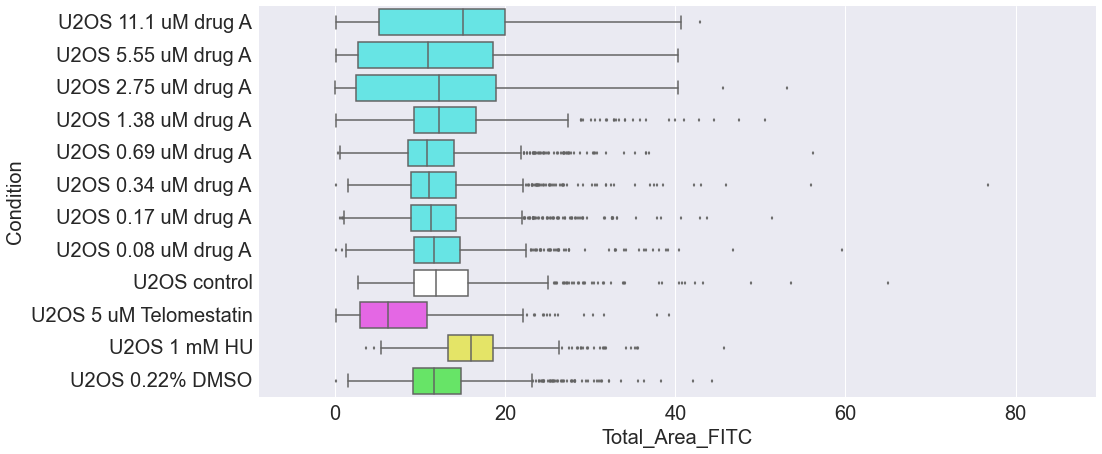

In [13]:
interactive(plot_dist,parameter=get_params(U2OS),max_shown=widgets.FloatSliderWidget(min=1,max=10,step=0.3,value=3))

Vertical, just dots, distributions, histograms